# Sales_ Analysis_Project

### load important libraries

In [1]:
import pandas as pd
import os 
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#all_sales.to_csv('F:\\my protofolio\\pandas_projects\\meduim_projects\\sales_analysis\\all_sales.csv', index=False)


### task #1: merging 12 months dataset into one file

In [3]:
#create list of months names to use it when connecting all months together in the same df
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]
# Create an empty list to store DataFrames for each month
monthly_dfs = []
#define the base directory
base_dir='C:/Users/midoo/'

# Loop through each month
for month in months:
    # Generate file path for each month
    file_path = f'{base_dir}Sales_{month}_2019.csv'  # Assuming file names are like '‪C:/Users/midoo/Sales_January_2019.csv'
    
    # Read the CSV file for the current month into a DataFrame
    df = pd.read_csv(file_path)
    
    # Add the DataFrame to the list
    monthly_dfs.append(df)

# Concatenate all DataFrames vertically
all_sales = pd.concat(monthly_dfs)

# Display the combined DataFrame
all_sales.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### another approach for first_task

In [4]:
#load all csv's names in list by using  list comprehension 
files=[file for file in os.listdir('C:/Users/midoo/Sales_Data')]
#empty dataframe to store all months sales
all_months_data=pd.DataFrame()
#iterating over every file in list,convert it into csv
#every month concat it with previous months
for file in files:
    df=pd.read_csv(file)
    all_months_data=pd.concat([all_months_data,df])
    

all_months_data.to_csv("all_data.csv",index=False)

#### updated_dataframe

In [5]:
all_data=pd.read_csv('C:/Users/midoo/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### cleaning_before_answer questions

In [6]:
#remove any Nan values 
all_data=all_data.dropna()
#remove any non numeric values 
all_data=all_data[all_data['Order Date']!='Order Date']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Adding_column_for_month#

In [7]:
#split every value in Order Date column before '/' and get the first string from generated list which is # of the month
all_data['month']=all_data['Order Date'].str.split('/').str[0]
#convert the price and Quantity from  string to int so i can use it in calculations
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['month']=all_data['month'].astype('int32')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Question #1: What was the best month for sales? how much was earned this month?

In [8]:
#add new column to get total price of each order
all_data['total_amount']=all_data['Quantity Ordered']*all_data['Price Each']
#group the data by month then get the sum of total prices and get max 
res=all_data.groupby('month')['total_amount'].sum().reset_index()
res


,month,total_amount
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


#### visualizing the result

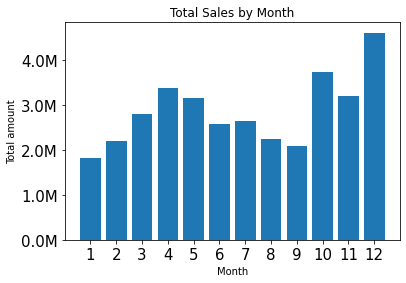

In [9]:

plt.bar(res['month'],res['total_amount'])
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Total amount')  # Label for the y-axis
plt.title('Total Sales by Month')  # Title for the plot
plt.xticks(res['month'],size=15)
plt.yticks(size=15)
# Define a function to format y-axis labels
def format_func(value, tick_number):
    return f'{value/1000000:.1f}M'  # Convert values to millions and add "M"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.show()

In [10]:
##we can see that the sales in 12 is very high compared to other months that because New Year's Holiday 
##all people exchange gifts with each other 
## in months of jan,feb,mar isn't so well bec the segmentation of student is still studying 

#### Adding City column

In [11]:
#split every value in Purchase Address column before ',' and get the second string from generated list which is city name
#all_data['city']=all_data['Purchase Address'].str.split(',').str[1]
#another appraoch 
#define func to get the string after the first comma and the state
def bring_city( Address):
    return  Address.split(',')[1]
def bring_state( Address):
    return  Address.split(',')[2].split(' ')[1]

# using apply function to perform any function by appply it in Purchase Address iterating over every element 
#in column by lambda and bring the city name and the state name
all_data['city']=all_data['Purchase Address'].apply(lambda x: bring_city(x)+' '+bring_state(x))
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_amount,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


### Question #2: What city sold the most product?

In [12]:
#group the rows by city and state name then get sum of sales by city and state name and order them from descending prespective 
res1=all_data.groupby('city')['total_amount'].sum().reset_index(name='total_amount')

#### visualizing the result and give explinations

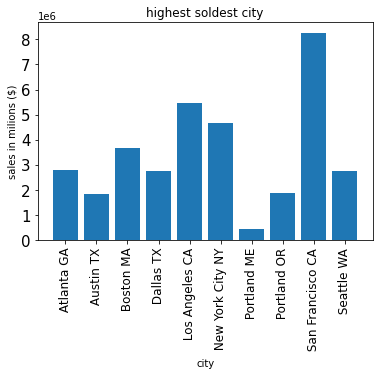

In [13]:

plt.bar(res1['city'],res1['total_amount'])
plt.xlabel('city')  # Label for the x-axis
plt.ylabel('sales in milions ($)')  # Label for the y-axis
plt.title('highest soldest city')  # Title for the plot
plt.xticks(res1['city'],rotation='vertical',size=12)
plt.yticks(size=15)
plt.show()

In [14]:
##as we see san francisco is highest sold city because it has highest paid salaries in us on the other hand
## portland is lowest sold city because it has lowest salaries in us
#San Francisco's tech-oriented population and strong presence of technology companies likely drive higher sales for tech-related products
#while Portland's market may be less focused on these types of goods.

### Question #3: What time should we display advertisements to maximize the likelihood of purchases?

#### add new column which own # of hour 

In [15]:
##convert order date into datetime format to easily manipulate into hour 
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
##adding new column called hour and having num of hour 
all_data['hour']=all_data['Order Date'].dt.hour
#group element by num of hour then get # of orders in every hour 
res2=all_data.groupby('hour')['Order ID'].count().reset_index(name='# of orders')
res2

,hour,# of orders
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


#### visualizing the result and give explinations

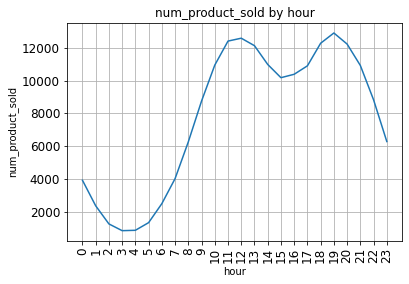

In [16]:


plt.plot(res2['hour'],res2['# of orders'],linestyle='-')
plt.xticks(res2['hour'],rotation='vertical',size=12)
plt.xlabel('hour')
plt.ylabel('num_product_sold')
plt.title('num_product_sold by hour')
plt.yticks(size=12)
plt.grid()
plt.show()

In [17]:
##At 11 AM, many people are typically settled into their workday, taking breaks or making purchases during lunchtime.
#At 7 PM, after finishing work or school, individuals often engage in leisure activities, including shopping or running errands before dinner.
#so i reccomend around 11 am and 7 pm 

In [18]:
all_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

### Question #4: What products are most often sold together? 

In [19]:
#we must get all the same order id without any uniquely id's to get the products sold together
m=all_data[all_data['Order ID'].duplicated(keep=False)]
#Merging repetead order id's and filter from them the repeated products
two_product=pd.merge(m,m,on='Order ID',how='inner').query('Product_x!=Product_y')
#combine the two products in one column
two_product['products']=list(zip(two_product['Product_x'], two_product['Product_y']))
##keep only unique order id with two products purchased
two_product=two_product[two_product['Order ID'].duplicated(keep='first')][['Order ID','products']]
#split two products of one column into two columns every one with one product
two_product[['prod_1', 'prod_2']] = two_product['products'].apply(pd.Series)

two_product.head(10)


,Order ID,products,prod_1,prod_2
2,176560,"(Wired Headphones, Google Phone)",Wired Headphones,Google Phone
6,176574,"(USB-C Charging Cable, Google Phone)",USB-C Charging Cable,Google Phone
14,176586,"(Google Phone, AAA Batteries (4-pack))",Google Phone,AAA Batteries (4-pack)
18,176672,"(USB-C Charging Cable, Lightning Charging Cable)",USB-C Charging Cable,Lightning Charging Cable
22,176681,"(ThinkPad Laptop, Apple Airpods Headphones)",ThinkPad Laptop,Apple Airpods Headphones
26,176689,"(AAA Batteries (4-pack), Bose SoundSport Headp...",AAA Batteries (4-pack),Bose SoundSport Headphones
30,176739,"(Google Phone, 34in Ultrawide Monitor)",Google Phone,34in Ultrawide Monitor
34,176774,"(USB-C Charging Cable, Lightning Charging Cable)",USB-C Charging Cable,Lightning Charging Cable
38,176781,"(Lightning Charging Cable, iPhone)",Lightning Charging Cable,iPhone
42,176797,"(Google Phone, Wired Headphones)",Google Phone,Wired Headphones


In [29]:
#group the two products and counts the occurance of this two products together 
two_prods_occurance=two_product.groupby(['prod_1','prod_2']).size().sort_values(ascending=False).reset_index(name='occ')
two_prods_occurance.head(10)

,prod_1,prod_2,occ
0,Lightning Charging Cable,iPhone,1006
1,USB-C Charging Cable,Google Phone,987
2,Wired Headphones,iPhone,449
3,Wired Headphones,Google Phone,415
4,USB-C Charging Cable,Vareebadd Phone,362
5,Apple Airpods Headphones,iPhone,360
6,Bose SoundSport Headphones,Google Phone,220
7,USB-C Charging Cable,Wired Headphones,165
8,Wired Headphones,USB-C Charging Cable,163
9,Wired Headphones,Vareebadd Phone,143


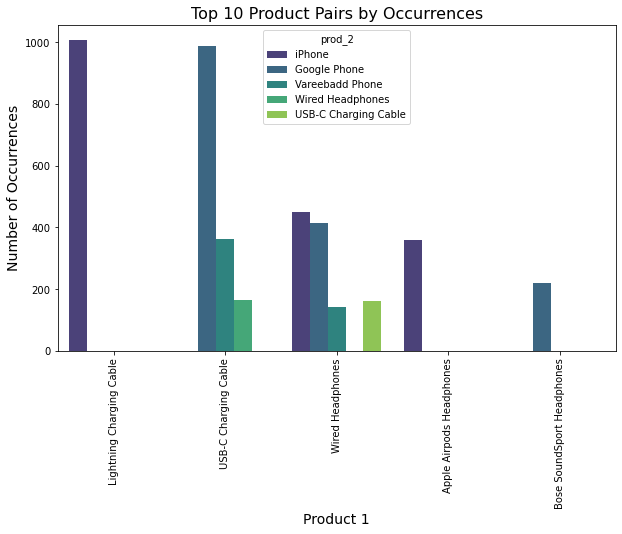

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 pairs of products and their occurrences
top_10_pairs = two_prods_occurance.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='prod_1', y='occ', data=top_10_pairs, hue='prod_2', palette='viridis')

# Rotate x-axis labels to vertical orientation
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Product 1', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.title('Top 10 Product Pairs by Occurrences', fontsize=16)

# Show plot
plt.show()



#### my_observations and suggestions

In [21]:
#so we have observation that products are most often sold together are phones with Headphones and charging cables
#from examples of that [[Lightning Charging Cable,iPhone]:1006,[USB-C Charging Cable,Google Phone]:987,[Wired Headphones,iPhone]:449]
#so we can make several suggestions to increase sales:
#Bundle Deals: Offer bundle deals or package discounts for the frequently co-purchased products.
#This strategy encourages customers to buy both products together, increasing the overall sales value while providing perceived value to the customers
#Cross-Selling: Implement cross-selling strategies by recommending complementary products during the checkout process or on product pages.
#For example, if customers are buying a camera, suggest related accessories like memory cards, tripods, or camera cases.
#if you have two related products you must have the same # in the inventory because it is likely to sold together

### Question #5: What product sold the most? Why do you think it did?

In [47]:
#group rows by product and get the sum of orderd quantity  
res4=all_data.groupby('Product')['Quantity Ordered'].sum().reset_index(name='num_purchased')
#get the price of each product 
res5=all_data.groupby('Product').mean()['Price Each'].reset_index(name='price')
#merging this two column in the same table to use it in combined figure 
res5=pd.merge(res4,res5,on='Product',how='inner')
res5

,Product,num_purchased,price
0,20in Monitor,4129,109.99
1,27in 4K Gaming Monitor,6244,389.99
2,27in FHD Monitor,7550,149.99
3,34in Ultrawide Monitor,6199,379.99
4,AA Batteries (4-pack),27635,3.84
5,AAA Batteries (4-pack),31017,2.99
6,Apple Airpods Headphones,15661,150.00
7,Bose SoundSport Headphones,13457,99.99
8,Flatscreen TV,4819,300.00
9,Google Phone,5532,600.00


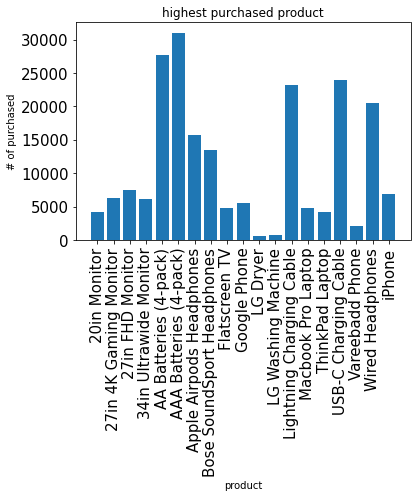

In [23]:
plt.bar(res4['Product'],res4['num_purchased'])
plt.xlabel('product')  # Label for the x-axis
plt.ylabel('# of purchased')  # Label for the y-axis
plt.title('highest purchased product')  # Title for the plot
#make label rotation in x-axis vertical and size of each label=15
plt.xticks(res4['Product'],rotation='vertical',size=15)
#size of each labelin y_axis=15
plt.yticks(size=15)


plt.show()

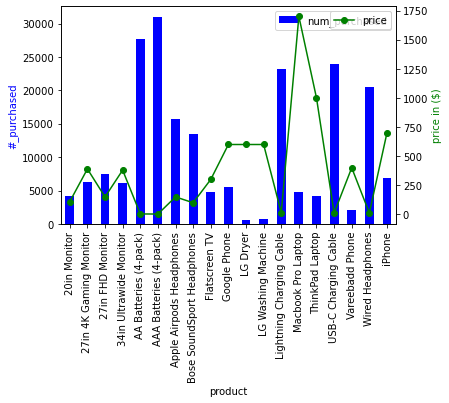

In [48]:
# Create figure which is  top-level container for all plot elements and axis objects represents a single subplot within the figure.
fig, ax1 = plt.subplots()

# creating Bar chart by specifying x-axis and y-axis and assign this plot for ax1
res5.plot(kind='bar', x='Product', y='num_purchased', ax=ax1, color='blue')

# Create a second y-axis for the line chart by sharing the same x-axis of ax1
ax2 = ax1.twinx()

# Line chart by specifying x-axis and y-axis and assign this plot for ax2
res5.plot(kind='line', x='Product', y='price', ax=ax2, color='green', marker='o')

# Set labels and title for two y-axis and shared x-axis
ax1.set_ylabel('#_purchased', color='blue')
ax2.set_ylabel('price in ($)', color='green')
ax1.set_xlabel('product')

# Show plot
plt.show()

In [ ]:
##your assumption is slightly right because  are commonly used in various household electronics such 
#as remote controls, toys, and small appliances. They are considered essential items for powering everyday devices.
# Unlike durable goods such as laptops or TVs,[ batteries,USB-C Charging Cable,Lightning Charging Cable] are consumable items that need to be replaced regularly 
#as they are depleted. This leads to more frequent purchases, resulting in higher sales volume.
#but in some products it seems not very right like gaming ,ultrawide and 4k monitors
##as it used in many jobs like (graphic design ,motion graphic,Video Editors and 3D Artists and Animators)and many other jobs
##so it make sense

In [25]:
##all_data[all_data['Product'].isin(['USB-C Charging Cable'
#,'Lightning Charging Cable',
#'AAA Batteries (4-pack)',
#'AA Batteries (4-pack)' ])].drop_duplicates(keep='first')[['Product','Price Each']]


In [26]:

all_data.groupby('city')['total_amount'].sum().reset_index(name='total_amount')

,city,total_amount
0,Atlanta GA,2795498.58
1,Austin TX,1819581.75
2,Boston MA,3661642.01
3,Dallas TX,2767975.40
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
6,Portland ME,449758.27
7,Portland OR,1870732.34
8,San Francisco CA,8262203.91
9,Seattle WA,2747755.48
